# Desarrollo de una Red Neuronal Basica paso a paso

In [58]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importar el data set
os.chdir('D:\DMC VIDEOS\DEEP LEARNING INMERSION\MOD1\MATERIALES')

In [3]:
miArchivo='Churn_Modelling.csv'
df=pd.read_csv(miArchivo)

### ------------------------------------------------------------------------------------------------------------
## **PARTE I - ENTENDIMIENTO Y TRATAMIENTO DE DATOS**
### ------------------------------------------------------------------------------------------------------------

In [4]:
# Revisamos la dimension del dataset!
df.shape

(10000, 14)

In [5]:
# Revisamos los primeros registros del set de datos
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#Funcion desarrollada para visualizar la data en base a nuestra target
def printBalanceo(data, field_grouping, data_name):
    print("\nCantidad de elementos por Clase en ", data_name, ":")
    target_count = data[field_grouping].value_counts()
    target_count.plot(kind='bar', title='Count (' + field_grouping + ')');

    print('Clase 0:', target_count[0], "({:.2%})".format(round(target_count[0] / (target_count[0]+target_count[1]), 2)))
    print('Clase 1:', target_count[1], "({:.2%})".format(round(target_count[1] / (target_count[0]+target_count[1]), 2)))
    print('Total  :', data.shape[0])


Cantidad de elementos por Clase en  Dataset :
Clase 0: 7963 (80.00%)
Clase 1: 2037 (20.00%)
Total  : 10000


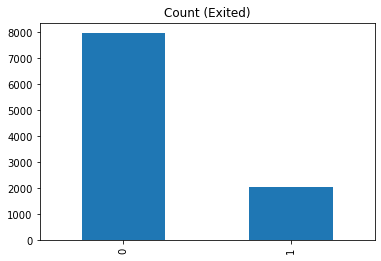

In [7]:
# Revisamos el target del set de datos!
printBalanceo(df,'Exited','Dataset')

In [8]:
#Separamos las columnas numericas y las categoricas (Es recomendable hacer esta separación por buenas prácticas)
ColumnsCategóricas = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
ColumnsNumericas = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

In [9]:
#Antes de hacer cualquier trabajo con los datos, vemos los valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Creamos 2 dataset de variables categoricas!
df_categoricas_01=df[ColumnsCategóricas]

In [11]:
df_categoricas_01.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [12]:
#Tratamiento de Variables Categoricas
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

for c in df_categoricas_01:
    print(str(c))
    le=LabelEncoder()
    df_categoricas_01[str(c)]=le.fit_transform(df_categoricas_01[str(c)])

Geography
Gender
HasCrCard
IsActiveMember
Exited


<ipython-input-12-1d44c07cf1d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricas_01[str(c)]=le.fit_transform(df_categoricas_01[str(c)])


In [13]:
df_categoricas_01.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,2,0,1,1,0


In [14]:
#Concatenamos las información!
df2 = pd.concat([df[ColumnsNumericas],df_categoricas_01],axis=1)

In [15]:
#Ya tenemos nuestra data de manera numerica
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,619,42,2,0.00,1,101348.88,0,0,1,1,1
1,608,41,1,83807.86,1,112542.58,2,0,0,1,0
2,502,42,8,159660.80,3,113931.57,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,2,0,1,1,0


In [16]:
#Separamos las covariables y la target !
X=df2.iloc[:,:10]
y=df2.iloc[:,10]

### ------------------------------------------------------------------------------------------------------------------------
## **PARTE II - PARTICION MUESTRAL  Y ESCALAMIENTO DE DATOS**
### ------------------------------------------------------------------------------------------------------------------------

In [17]:
#Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, #covariables
                                                 y, #target
                                                 test_size=0.33, #33% de la data total para data de testing
                                                 random_state=111,
                                                 stratify=y)

In [18]:
#Importante !!!
#Escalado de variables
from sklearn.preprocessing import StandardScaler #Importamos el modulo
sc_X=StandardScaler()                            #Definimos la funcion
X_train = sc_X.fit_transform(X_train)            # entrenamos y aplicamos
X_test = sc_X.fit_transform(X_test)              # entrenamos y aplicamos

### ------------------------------------------------------------------------------------------------------------------------
## **PARTE III - CONSTRUCCION DE LA RED NEURONAL ARTIFICIAL**
### ------------------------------------------------------------------------------------------------------------------------

In [19]:
#pip install keras

In [20]:
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

In [21]:
# Inicializar la RNA.
# Si la definimos como secuencia de capas es mucho mas facil despues trabajar con ellas.
classifier = Sequential() # Podria codificar aca las capas y demas pero lo hacemos una a una.

In [22]:
# Añadir las capas de entrada y primera capa oculta
# Dense es un tipo de capa, la necesitamos codificar. 
# units : Numero de neuronas
# kernel_initializer : Inicializacion de pesos.
# activation : Funcion de activacion que te ayuda a la ingenieria de variables!(evita la linealidad)
# input_dim : Es el numero de variables o X o features.
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 10)) # Primera capa oculta
#classifier.add(Dropout(p = 0.05))

In [23]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
#classifier.add(Dropout(p = 0.01)) # Regularización

In [24]:
# Añadir la capa de salida
# Solo necesitamos una unidad pues tenemos un resultado binario.
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
# Si tengo mas de 2 categorias , puedo mantener la funcion de activacion sigmoide? +1
#Si es multinomial, la que me convendria sería softmax

In [25]:
# Compilar la RNA
# Podemos probar con distintos optimizadores
#loss=funcion de costo 
    #-----------binary_crossentropy(entropia cruzada)-para clasificacion
    #-----------Error cuadratico medio(MSE) -para regresion(se cambiara la funcion de activation de la capa salida )
#optimizer
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
classifier.summary() #Visualizamos nuestra arquitectura de red

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### ------------------------------------------------------------------------------------------------------------------------
## **PARTE IV - ENTRENAMIENTO DE LA RED NEURONAL ARTIFICIAL**
### -------------------------------------------------------------------------------------------------------------------------

In [27]:
# Ajustamos la RNA al Conjunto de Entrenamiento
# batch_size : Numero de observaciones antes de actualizar los pesos/ tamaño del bloque a procesar.
# epochs     : Numero de iteracciones globales / Mas veces mas aprendizaje u overfitting.
history = classifier.fit(X_train, 
                         y_train, 
                         validation_split=0.33, 
                         batch_size = 32, 
                         epochs = 100)
# abusar de las epochs podria significar caer en un sobreajuste(overfitting)

Epoch 1/100
141/141 [==============================] - 24s 30ms/step - loss: 0.6728 - accuracy: 0.8070 - val_loss: 0.5455 - val_accuracy: 0.7839
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8047 - val_loss: 0.4624 - val_accuracy: 0.7839
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8068 - val_loss: 0.4584 - val_accuracy: 0.7839
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7973 - val_loss: 0.4578 - val_accuracy: 0.7839
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.8104 - val_loss: 0.4545 - val_accuracy: 0.7839
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8033 - val_loss: 0.4532 - val_accuracy: 0.7839
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.7971 - val_loss: 0.4518 - val_accuracy: 0.78

In [28]:
# Evaluar el modelo y calcular predicciones finales
y_pred_train  = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

### -----------------------------------------------------------------------------------------------------------------
## **PARTE V - VALIDACION DE LA RED NEURONAL ARTIFICIAL**
### -----------------------------------------------------------------------------------------------------------------

In [29]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,classification_report

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

recall_train = accuracy_score(y_train, y_pred_train)
recall_test = accuracy_score(y_test, y_pred_test)


print(cm_train)
print('------------------------')
print(cm_test)
print('------------------------')
print(recall_train)
print(recall_test)

[[5163  172]
 [ 916  449]]
------------------------
[[2533   95]
 [ 470  202]]
------------------------
0.8376119402985075
0.8287878787878787


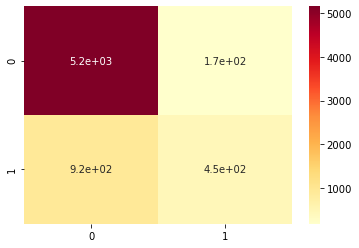

In [32]:
sns.heatmap(cm_train,cmap='YlOrRd',annot=True)

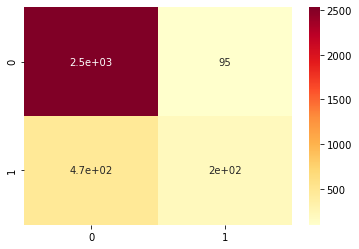

In [33]:
sns.heatmap(cm_test,cmap='YlOrRd',annot=True)

In [34]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_test).ravel()
(tn,fp,fn,tp)

(2533, 95, 470, 202)

In [35]:
#Generamos la matriz de reporte

In [36]:
matrix_train = classification_report(y_train,y_pred_train)
print('Classification Report-Train: \n', matrix_train)

Classification Report-Train: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      5335
           1       0.72      0.33      0.45      1365

    accuracy                           0.84      6700
   macro avg       0.79      0.65      0.68      6700
weighted avg       0.82      0.84      0.81      6700



In [37]:
matrix_test = classification_report(y_test,y_pred_test)
print('Classification Report-Test: \n', matrix_test)

Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      2628
           1       0.68      0.30      0.42       672

    accuracy                           0.83      3300
   macro avg       0.76      0.63      0.66      3300
weighted avg       0.81      0.83      0.80      3300



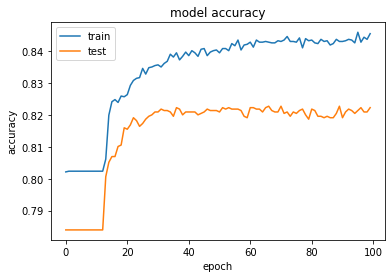

In [38]:
# Resumen del historial del accuracy!
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

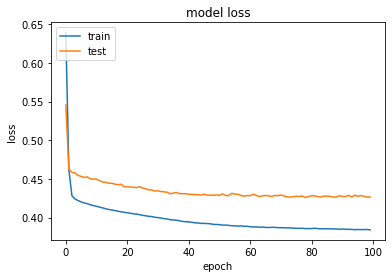

In [39]:
# Resumen del historial del error!
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Guardamos el modelo de red neuronal para usarlo cuando lo necesitemos!
classifier.save('modelo1RedNeuronal.h5') 

In [41]:
# Leemos el modelos con todos los pesos de la red neuronal!
new_model = keras.models.load_model('modelo1RedNeuronal.h5')

In [42]:
# Mostramos la arquitectura del modelo!
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### -----------------------------------------------------------------------------------------------------------------
## **PARTE VI - MEJORAR Y TUNEAR LA RED NEURONAL**
### -----------------------------------------------------------------------------------------------------------------

Nuestra red actual trabaja con un algoritmo estable, aunque segun la matriz de confusión, nuestra red no tiene mucha precisión sobre la gente fugada, en este apartado se busca mejorar ese punto

In [43]:
# Evaluaremos, mejoraremos y Ajustamos la RNA

In [50]:
### Evaluar la **RNA**
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [45]:
# Construimos un clasificador
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 10))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
  classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [46]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 100)
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  6.6min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min finished


In [47]:
# Corroboramos si estamos ante un problema de Bias o Variance
mean = accuracies.mean()
variance = accuracies.std()

In [48]:
# Validamos la media y desviacion estandar del accuracy!
print(mean)
print(variance)

0.7962686479091644
0.008658017961903798


### Mejorar la RNA
#### Regularización de Dropout para evitar el *overfitting*

In [51]:
### Ajustar la *RNA*
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # sklearn.grid_search

In [52]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = "uniform",  activation = "relu", input_dim = 10))
  classifier.add(Dense(units = 16, kernel_initializer = "uniform",  activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
  classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [53]:
# Construimos el clasificador
classifier = KerasClassifier(build_fn = build_classifier)

In [54]:
# Hacemos el grid con los parámetros que queremos optimizar
parameters = {
    'batch_size' : [25,32],
    'nb_epoch' : [100, 250 , 500], 
    'optimizer' : ['adam', 'rmsprop']
}

In [56]:
# Ajustamos el Random GridSearch
grid_search = RandomizedSearchCV(classifier, #clasificador
                                 parameters, #parametros a optimizar
                                 scoring = 'accuracy', # puede ser propio de python o propiamiento construido
                                 cv = 3) # cv(validacion cruzada): lo ideal en proyectos fuertes en 10

#En este caso ajustamos la red con RandomGridSearchCV, tambien podriamos haber usado el GridSearchCV
#La diferencias entre estas radica en que GridSearchCV realiza un ajuste exhaustivo(comparacion y ajusta contra todos los hiperparametros)
#Y RandomGridSearchCV realiza no utiliza todos los hiperparametros, solo unos cuantos de manera aleatoria, por eso se llama RandomGridSearchCV
# En cuanto a costo computacional GridSearchCV suele ser muy fuerte, por eso en este caso solo aplicamos RandomGridSearchCV
# Tambien existe un ajuste Bayesiano

#Para el uso de GridSearchCV solo cambiar RandomizedSearchCV por GridSearchCV, los parametros de la función son los mismos

In [57]:
grid_search = grid_search.fit(X_train,y_train)

140/140 [==============================] - 1s 1ms/step - loss: 0.6450 - accuracy: 0.7727


D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


210/210 [==============================] - 1s 967us/step - loss: 0.6281 - accuracy: 0.7830


In [59]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [60]:
print(best_parameters)
print(best_accuracy)

{'optimizer': 'rmsprop', 'nb_epoch': 100, 'batch_size': 32}
0.7962669771393879


**Nos dice que nuestro mejor accuraccy es 79, tal vez no es el mas alto que hayamos tenido pero indica un equilibrio entre todos los indicadores**

**Los valores obtenidos son los que debemos modificar en nuestra red inicial para poder obtener una red neuronal mas fuerte**

# FIN !!